# CPSC 222 DA6 - Detailed Stats Exercises

Jonathan Smoley

November 16, 2021

In [239]:
# Imported Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

## Setup

An experiment was conducted to collect data on the number of days in advance that students in  
CPSC122 sections in the Spring 2020 semester pushed their assignments to Github. S1 is the first  
section of CPSC122 and it was used as the *control* group. Conversely, the S2 section was used  
as the *experiment* group where a different automated tool was used to provide encouragement in  
finishing assignments early.

In [240]:
# Samples of the number of days students in two sections of CPSC122 pushed early to GitHub
S1 = pd.Series([15, 50, 0, 5, 0, 2, 0, 0, 0, 2, 0, 7, 0, 0, 0, 3, 0, 0, 12, 15, 0, 1, 0, 0, 0])
S2 = pd.Series([33, 3, 2, 8, 0, 41, 2, 0, 20, 1, 0, 0, 3, 17, 0, 5, 2, 0, 14, 4, 16, 22, 28, 4, 94])

### 1. S2 Mid Value

To get the middle value of the sample as it is, divide the length of the sample in half and take  
the value at that index.

number of values = 25

$\frac{25}{2}$ = 12.5 (so take the value at index of 13)

```python
S2[13] = 3
```

In [241]:
S1_mid = S1[len(S1)//2]
S2_mid = S2[len(S2)//2]

### 2. S2 Mean

For the mean of a sample the formula is to sum the values in the sample and divide that  
summation by the size of the sample.

$\sum_{k=1}^{25} S2_{k}$  
33 + 3 + 2 + 8 + 0 + 41 + 2 + 0 + 20 + 1 + 0 + 0 + 3 + 17 + 0 + 5 + 2 + 0 + 14 + 4 + 16 + 22 + 28 + 4 + 94 = 319

Each section has 25 students, so divide by 25:

$\frac{sum}{n} = \overline{X}$

$\frac{319}{25}$ = 12.76

In [242]:
# use the numpy library for its mean member function
S1_mean = S1.mean()
S2_mean = S2.mean()

### 3. S2 Median

Median of S2 is the middle value once the list is sorted from smallest value to largest value.  
With the numpy library a member function can be used to accomplish this.

Sorted: 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 3, 3, 4, 4, 5, 8, 14, 16, 17, 20, 22, 28, 33, 41, 94

Middle Value: 4

In [243]:
# use the numpy library for its median member function
S1_median = S1.median()
S2_median = S2.median()

### 4. S2 Mode

To get the mode of the S2 sample the number of days that occurs most often needs to be found.

Therefore, the mode is 0 because it occurs most among the values in the S2 sample.

mode = 0

In [244]:
# grab the counts of each number of days, take the max of that list
S1_mode = np.bincount(S1).argmax()
S2_mode = np.bincount(S2).argmax()

### 5. S2 Range

If the range of the sample is wanted, subtract the smallest value from the largest value.

max value in S2: 94
min value in S2: 0

Range = 94 - 0 = 94

Range = 94

In [245]:
S1_range = max(S1) - min(S1)
S2_range = max(S2) - min(S2)

### 6. S2 Quartiles

With quartiles, a manual computation for each involves the following:

$1^{st} Quartile: \frac{1}{4}\times(n+1)^{th} term$

$\frac{1}{4}\times(25 + 1) = \frac{1}{4}\times(26) = 6.5$ (rounded to position 7)

7th element: 1

$2^{nd} Quartile: \frac{2}{4}\times(n+1)^{th} term$ (though this is equivalent to the median)

$\frac{2}{4}\times(25 + 1) = \frac{2}{4}\times(26) = 13$

13th element: 4

$3^{rd} Quartile: \frac{3}{4}\times(n+1)^{th} term$

$\frac{3}{4}\times(25 + 1) = \frac{3}{4}\times(26) = 19.5$ (rounded to position 19)

19th element: 17

In [246]:
S1_quartile1 = np.quantile(S1, 0.25)
S1_quartile2 = np.quantile(S2, 0.5)
S1_quartile3 = np.quantile(S1, 0.75)

S2_quartile1 = np.quantile(S2, 0.25)
S2_quartile2 = np.quantile(S2, 0.5)
S2_quartile3 = np.quantile(S2, 0.75)

### 7. S2 Variance (sample)

Sample variance is calculated by summing the squares of each element minus the mean:

$\sum_{k=1}^{25} (S2[k] - S2_{mean})^{2}$

$(33 - 12.76)^{2} + ... + (94 - 12.76)^{2}$ = 403.86

In [247]:
S1_var = np.var(S1)
S2_var = np.var(S2)

### 8. S2 Standard Deviation (sample)

Standard Deviation is found by taking the square root of the variance.

$\sqrt{S2_{var}}$ = $\sqrt{403.86}$ = 20.1

In [248]:
S1_stdev = np.std(S1, ddof = 1)
S2_stdev = np.std(S2, ddof = 1)

### 9. S1 95% confidence interval for population mean

The formula for a confidence interval is: $\overline{x}\pm z\frac{s}{\sqrt{n}}$

$\overline{x} = S1_{mean}$ = 4.48

z = 0.95 (given)

s = $S1_{stdev}$ = 10.36

n = len(S1) = 25

$\overline{4.48}\pm \times{0.95} \times{\frac{10.36}{\sqrt{25}}}$ = [2.51, 6.45]

In [249]:
# 'moe' stands for 'margin of error'
z = 0.95

S1_moe_max = S1_mean + (z)*(S1_stdev / np.sqrt(len(S1)))
S1_moe_min = S1_mean - (z)*(S1_stdev / np.sqrt(len(S1)))


### 10. S2 95% confidence interval for population mean

This is the same as for the S1, but using the sample from S2.

Formula remains: $\overline{x}\pm z\frac{s}{\sqrt{n}}$

$\overline{x} = S2_{mean}$ = 12.76

z = 0.95 (given)

s = $S2_{stdev}$ = 20.1

n = len(S2) = 25

$\overline{12.76}\pm \times{0.95} \times{\frac{20.1}{\sqrt{25}}}$ = [8.94, 16.58]

In [250]:
# 'moe' stands for 'margin of error'
z = 0.95

S2_moe_max = S2_mean + (z)*(S2_stdev / np.sqrt(len(S2)))
S2_moe_min = S2_mean - (z)*(S2_stdev / np.sqrt(len(S2)))

### 10B. Plot of S1 and S2 Confidence Intervals

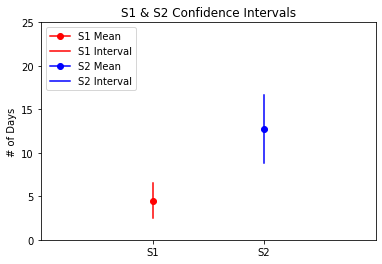

In [251]:
# visualize the margin of error
plt.plot([1], [S1_mean], color = 'red', marker = 'o', label = "S1 Mean")
plt.plot([1, 1], [S1_moe_min, S1_moe_max], color = 'red', label = "S1 Interval")

plt.plot([2], [S2_mean], color = 'blue', marker = 'o', label = "S2 Mean")
plt.plot([2, 2], [S2_moe_min, S2_moe_max], color = 'blue', label = "S2 Interval")

plt.title("S1 & S2 Confidence Intervals")
plt.xlim([0, 3])
plt.ylim([0, 25])
plt.ylabel("# of Days")
plt.xticks([1, 2], ["S1", "S2"])
plt.legend(loc = "upper left")
plt.show()

### 11. S2 One-sample, one-tailed t-test of the population mean

STEP 1

Null Hypothesis  
$H_{o}$: $\mu_{S2}$ > 7 days

Alternate Hypothesis  
$H_{1}$: $\mu_{S2}$ <= 7 days

STEP 2

Level of Significance
$\alpha$ = 0.05

STEP 3

t = $\frac{\overline{X_{S2}} - \mu_{S2}}{s_{S2} / \sqrt{n}}$

t = $\frac{\overline{X_{S2}} - \mu_{pop}}{S2_stdev / \sqrt{len(S2)}}$

t = $\frac{12.76 - 8.62}{20.51 / \sqrt{25}}$

t = 1.01

STEP 4

$\alpha$ = 0.05  
This is a one-tailed Test  
df (degrees of freedom) = n - 1 = 25 - 1 = 24

t-table value for t-critical: t-critical = 1.711

Decision Rules:
* if t-computed <= 1.711, reject $H_{o}$
* if t-computed > 1.711, do not reject $H_{o}$

STEP 5 (below)

Find t-computed, test against t-critical:

In [252]:
pop_mean = (sum(S1) + sum(S2)) / (len(S1) + len(S2))
pop_stdev = np.std(S1 + S2, ddof = 1)

t_comp = (S2_mean - pop_mean) / (S2_stdev / np.sqrt(len(S2)))
print("Manual t-computed:", t_comp)

Manual t-computed: 1.0092279070700745


In [253]:
# Check t-computed with SciPy
t, p = stats.ttest_1samp(S2, pop_mean)
print("SciPy t-computed:", t, "\nSciPy p-value:", p / 2)

SciPy t-computed: 1.0092279070700743 
SciPy p-value: 0.1614663667529621


### Conclusion

The t-computed value of about 1.01 is less than the t-critical value of 1.711. With confidence, I can say that  
$H_{o}$ should be rejected. For more evidence of this conculsion, the results from manual computations and  
SciPy computations were consistent for the resulting t-computed value.

Thus, at the significance level of 0.05 S2 students did not push more than 7 total days in advance of the  
deadlines for CPSC122 Programming Assignments.

### 12. S1 & S2 Two-sample, one-tailed t-test of the population means

STEP 1

$H_{o}: \mu_{S2} > \mu_{S1}$

$H_{1}: \mu_{S2} <= \mu_{S1}$

STEP 2

$\alpha$ = 0.05

STEP 3

I aligned $X_{1}$ with S2 because it was the section that underwent experimentation with the automated software tool.  
I aligned $X_{2}$ with S1 for the opposite reason.

t = $\frac{\overline{X_{1}} - \overline{X_{2}}}{\sqrt{S_{p}^{2}\times(\frac{1}{n_{1}} + \frac{1}{n_{2}})}}$

t = $\frac{\overline{X_{S2}} - \overline{X_{S1}}}{\sqrt{S1_{stdev}^{2}\times(\frac{1}{25} + \frac{1}{25})}}$

t = $\frac{12.76 - 4.48}{\sqrt{22.35^{2}\times(\frac{1}{25} + \frac{1}{25})}}$ = 1.79

STEP 4

$\alpha$ = 0.05  
one-tailed t-test  
degrees of freedom (df) = n - 1 = 25 - 1 = 24  
t-critical = 1.711

Decision Rules:
* if t-computed <= t-critical (1.711), reject $H_{o}$
* if t-computed > t-critical (1.711), do not reject $H_{o}$

STEP 5 (below)

Find a t-computed value & test it against the decision rules

In [254]:
t_comp = (S2_mean - S1_mean) / np.sqrt(((pow(S2_stdev, 2) / len(S2)) + (pow(S1_stdev, 2) / len(S1))))
print("Manual t-computed:", t_comp)

Manual t-computed: 1.794018604733852


In [255]:
# Check t-computed with SciPy
t, p = stats.ttest_ind(S2, S1, equal_var = False)
print("SciPy t-computed:", t, "\nSciPy p-value:", p)

SciPy t-computed: 1.794018604733852 
SciPy p-value: 0.08123187256401455


### Conclusion

The t-computed value of about 1.79 is greater than the t-critical value of 1.711. With confidence, I can say  
do not reject $H_{o}$. For more evidence of this conculsion, the results from manual computations and  
SciPy computations were consistent for the resulting t-computed value.

Thus, at the significance level of 0.05 S2 students did push final commits earlier on average than S1 students.